# Деревья решений
## Цель работы
Научиться применять модель дерева принятия решений для задач классификации и регрессии.

## Содержание работы
1. Cгенерируйте данные для задачи классификации на три класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 100 наблюдений. Визуализируйте их на диаграмме рассеяния.
2. Обучите модель классификационного решающего дерева sklearn.svm.DecisionTreeClassifier глубины 4 и критерием entropy.
3. Визуализируйте соответствующий граф дерева решений.
4. Визуализируйте полученные разделяющие области.
5. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.
6. Cгенерируйте данные для задачи регрессии, содержащие один признак и 100 наблюдений, как случайный шум некоторой функции. Визуализируйте их на диаграмме рассеяния.
7. Обучите модель регрессионного решающего дерева sklearn.svm.DecisionTreeRegressor глубиной 3.
8. Визуализируйте соответствующий граф дерева решений.
9. Визуализируйте получившуюся кусочную линию регрессии.
10. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [77]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Cгенерируйте данные для задачи классификации на три класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 100 наблюдений. Визуализируйте их на диаграмме рассеяния.

In [78]:
from sklearn.datasets import make_blobs

In [79]:
RANDOM_SEED = np.random.RandomState(0)

Text(0, 0.5, 'X2')

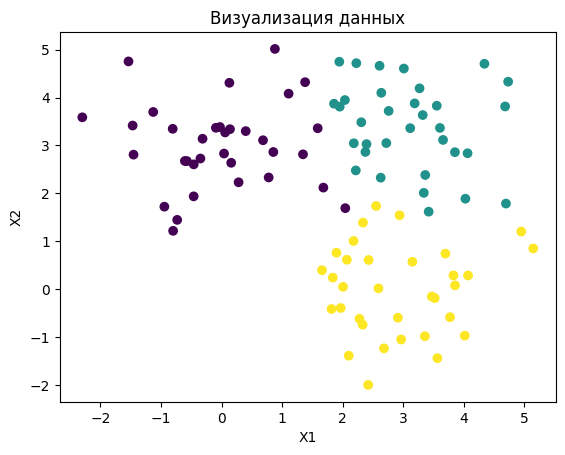

In [80]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

### 2. Обучите модель классификационного решающего дерева sklearn.svm.DecisionTreeClassifier глубины 4 и критерием entropy.

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       random_state=RandomState(MT19937) at 0x2D0DE5FDA40)

### 3. Визуализируйте соответствующий граф дерева решений.

In [83]:
from sklearn.tree import plot_tree

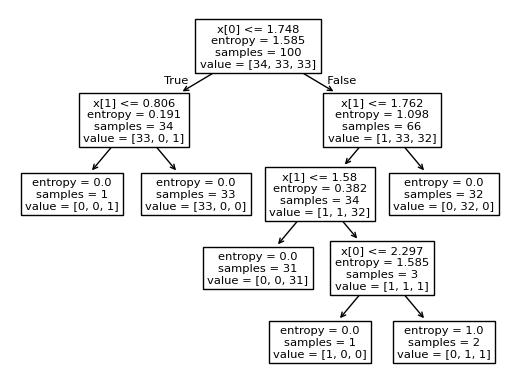

In [84]:
plot_tree(clf_tree) 
plt.show()

### 4. Визуализируйте полученные разделяющие области.

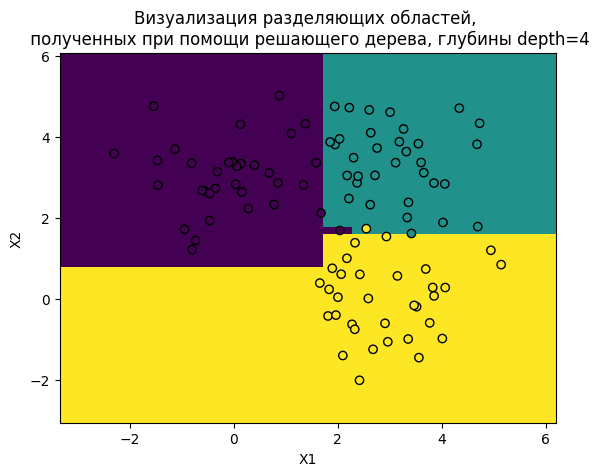

In [85]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 5. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [87]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


In [88]:
observation_new = [[2, 1]]

In [89]:
clf_tree.predict(observation_new)

array([2])

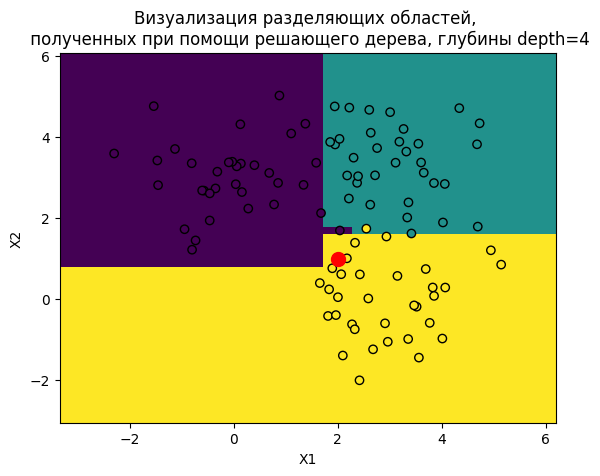

In [90]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black')
plt.scatter(observation_new[0][0], observation_new[0][1], c='r', s=100)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 6. Cгенерируйте данные для задачи регрессии, содержащие один признак и 100 наблюдений, как случайный шум некоторой функции. Визуализируйте их на диаграмме рассеяния.

In [91]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

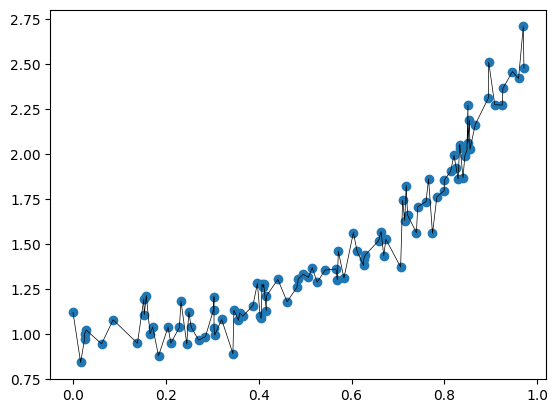

In [92]:
plt.scatter(X, y)
plt.plot(X, y, c='black', linewidth=0.5)

### 7. Обучите модель регрессионного решающего дерева sklearn.svm.DecisionTreeRegressor глубиной 3.

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=3,
                      random_state=RandomState(MT19937) at 0x2D0DE5FDA40)

### 8. Визуализируйте соответствующий граф дерева решений.

[Text(0.5, 0.875, 'x[0] <= 0.708\nsquared_error = 0.212\nsamples = 100\nvalue = 1.478'),
 Text(0.25, 0.625, 'x[0] <= 0.406\nsquared_error = 0.033\nsamples = 65\nvalue = 1.184'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 0.346\nsquared_error = 0.01\nsamples = 37\nvalue = 1.054'),
 Text(0.0625, 0.125, 'squared_error = 0.009\nsamples = 29\nvalue = 1.033'),
 Text(0.1875, 0.125, 'squared_error = 0.004\nsamples = 8\nvalue = 1.131'),
 Text(0.375, 0.375, 'x[0] <= 0.57\nsquared_error = 0.012\nsamples = 28\nvalue = 1.356'),
 Text(0.3125, 0.125, 'squared_error = 0.004\nsamples = 16\nvalue = 1.282'),
 Text(0.4375, 0.125, 'squared_error = 0.006\nsamples = 12\nvalue = 1.454'),
 Text(0.75, 0.625, 'x[0] <= 0.85\nsquared_error = 0.085\nsamples = 35\nvalue = 2.025'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 0.8\nsquared_error = 0.021\nsamples = 21\nvalue = 1.826'),
 Text(0.5625, 0.125, 'squared_error = 0.009\nsamples = 11\nvalue = 1.713'),
 Text(0.6875, 0.125, 'square

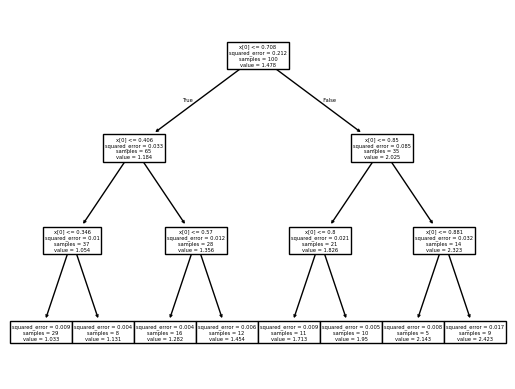

In [95]:
plot_tree(reg_tree)

### 9. Визуализируйте получившуюся кусочную линию регрессии.

Text(0, 0.5, 'y')

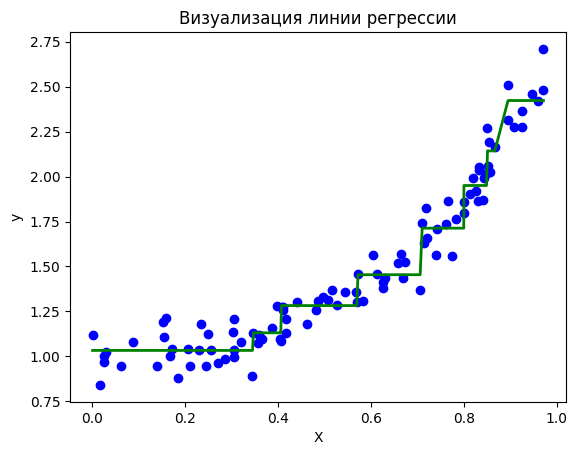

In [96]:
plt.scatter(X, y, c="b")

y_pred_reg = reg_tree.predict(X.reshape(-1, 1))
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')

### 10. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [97]:
from sklearn.metrics import r2_score, mean_squared_error

In [98]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9629837749711063
MSE=  0.007848542731107971


In [99]:
observation_new = [[0.7, 1.53]]

In [100]:
reg_tree.predict([[observation_new[0][0]]])

array([1.45391149])

Text(0, 0.5, 'y')

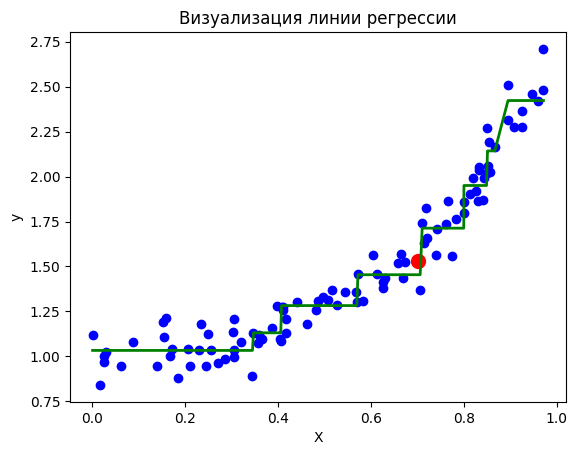

In [101]:
plt.scatter(X, y, c="b")

y_pred_reg = reg_tree.predict(X.reshape(-1, 1))
plt.plot(X, y_pred_reg, "g", lw=2)
plt.scatter(observation_new[0][0], observation_new[0][1], c='r', s=100)


plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')

## Задания для самостоятельного выполнения

### 1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

In [102]:
from sklearn.datasets import load_iris

In [103]:
iris = load_iris()

In [104]:
X = iris.data[:, 2:4]

In [105]:
y = iris.target

<Axes: >

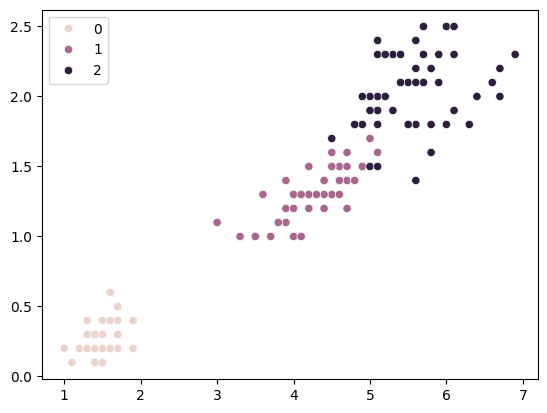

In [106]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

### 2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

In [107]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=RANDOM_SEED, criterion='entropy')

In [108]:
dtc.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       random_state=RandomState(MT19937) at 0x2D0DE5FDA40)

[Text(0.5, 0.9, 'x[1] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4090909090909091, 0.7, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.4545454545454546, 0.8, 'True  '),
 Text(0.5909090909090909, 0.7, 'x[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5454545454545454, 0.8, '  False'),
 Text(0.36363636363636365, 0.5, 'x[0] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.18181818181818182, 0.3, 'x[1] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.09090909090909091, 0.1, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.2727272727272727, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5454545454545454, 0.3, 'x[1] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.45454545454545453, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6363636363636364, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.818181818181

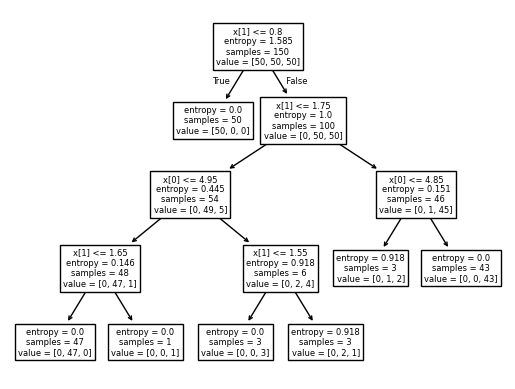

In [109]:
plot_tree(dtc)

### 3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области. / 4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [110]:
from sklearn.model_selection import train_test_split

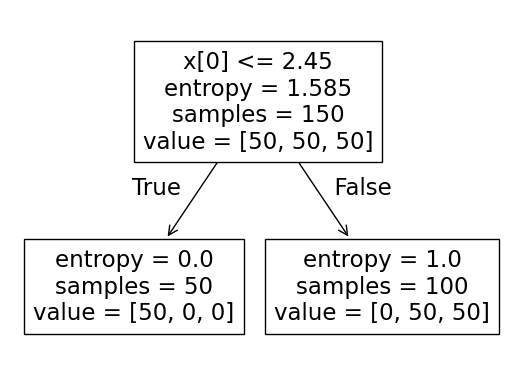

depth = 1
accuracy = 0.6578947368421053
f1_score = 0.6578947368421053
----------------------------------


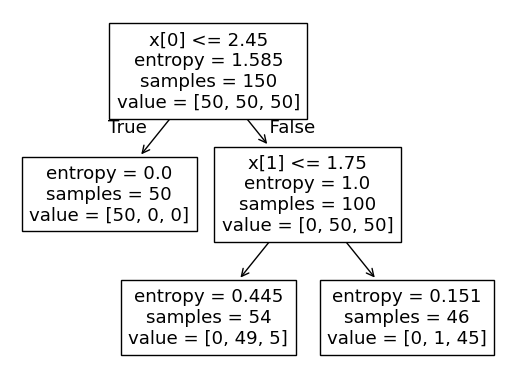

depth = 2
accuracy = 0.9736842105263158
f1_score = 0.9736842105263158
----------------------------------


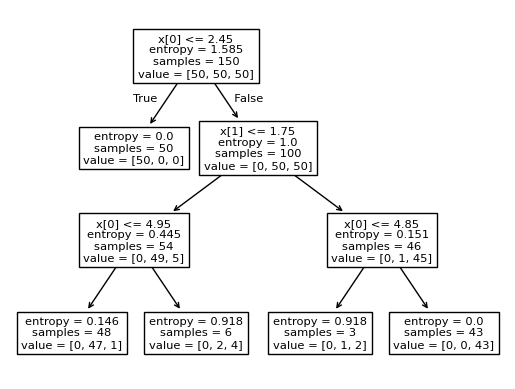

depth = 3
accuracy = 1.0
f1_score = 1.0
----------------------------------


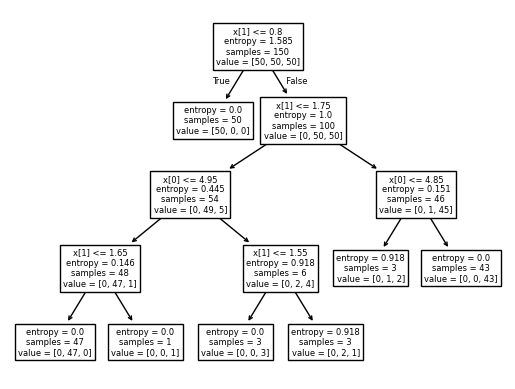

depth = 4
accuracy = 0.9736842105263158
f1_score = 0.9736842105263158
----------------------------------


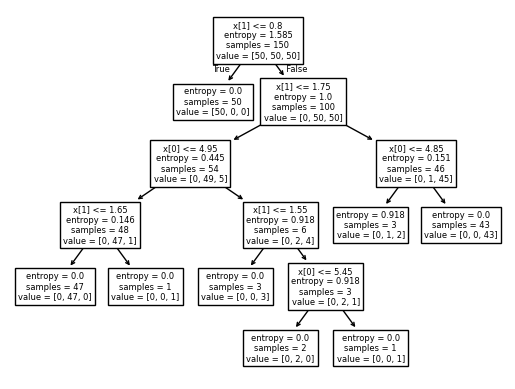

depth = 10
accuracy = 1.0
f1_score = 1.0
----------------------------------


In [111]:
depths = [1, 2, 3, 4, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)
for depth in depths:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_SEED, criterion='entropy')
    dtc.fit(X, y)
    plot_tree(dtc)
    plt.show()
    print('depth =', depth)
    print('accuracy =', accuracy_score(y_test, dtc.predict(X_test)))
    print('f1_score =', f1_score(y_test, dtc.predict(X_test), average='micro'))
    print('----------------------------------')


### 5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [112]:
X = iris.data 
y = iris.target

In [113]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=RANDOM_SEED, criterion='entropy')

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)

In [115]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       random_state=RandomState(MT19937) at 0x2D0DE5FDA40)

In [116]:
y_pred = dtc.predict(X_test)

In [117]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='micro')

(0.9473684210526315, 0.9473684210526315)

In [118]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 10]])

### 6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

In [119]:
from sklearn.datasets import fetch_california_housing

In [120]:
ch = fetch_california_housing()

c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\datasets\_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1028)>

In [ ]:
data = pd.DataFrame(data=ch.data, columns=ch.feature_names)
data['Target'] = ch.target

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X = data['AveBedrms']
y = data['Target']

<Axes: xlabel='AveBedrms'>

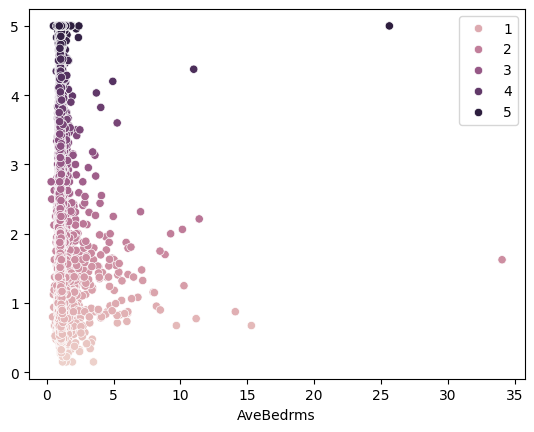

In [ ]:
sns.scatterplot(x=X, y=ch.target, hue=ch.target)

### 7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [122]:
dtr = DecisionTreeRegressor(max_depth=4, random_state=0)

In [ ]:
dtr.fit(X.to_frame(), y)

AttributeError: 'numpy.ndarray' object has no attribute 'to_frame'

### 8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

In [124]:
plot_tree(dtr)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_pred_reg = dtr.predict(X.to_frame())

### 9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [125]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

ValueError: Found input variables with inconsistent numbers of samples: [150, 100]

In [126]:
observation_new = [[0.5, 1.58955593]]

In [127]:
dtr.predict(observation_new)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

ValueError: x and y must be the same size

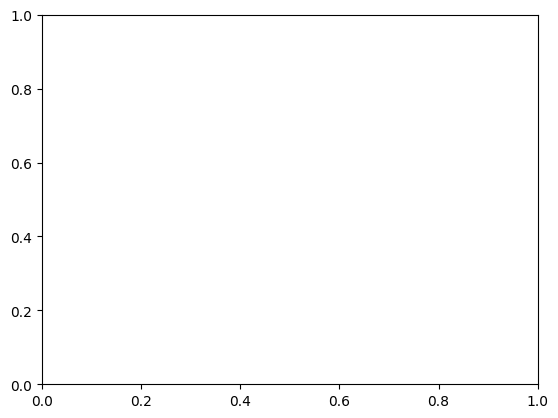

In [128]:
plt.scatter(X, y, c="b")
plt.scatter(observation_new[0][0], observation_new[0][1], c='r', s=100)


plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')

### 10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

In [129]:
fch = fetch_california_housing()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1028)>

In [ ]:
X = fch.data
y = fch.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED, test_size=0.2)

In [ ]:
dtr = DecisionTreeRegressor(max_depth=4, random_state=0)

In [ ]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

[Text(0.5, 0.9, 'x[0] <= 5.589\nsquared_error = 1.338\nsamples = 16512\nvalue = 2.073'),
 Text(0.25, 0.7, 'x[0] <= 3.129\nsquared_error = 0.899\nsamples = 14084\nvalue = 1.807'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[5] <= 2.161\nsquared_error = 0.584\nsamples = 6516\nvalue = 1.377'),
 Text(0.0625, 0.3, 'x[6] <= 37.975\nsquared_error = 1.109\nsamples = 988\nvalue = 1.918'),
 Text(0.03125, 0.1, 'squared_error = 1.179\nsamples = 773\nvalue = 2.114'),
 Text(0.09375, 0.1, 'squared_error = 0.228\nsamples = 215\nvalue = 1.217'),
 Text(0.1875, 0.3, 'x[6] <= 34.455\nsquared_error = 0.429\nsamples = 5528\nvalue = 1.28'),
 Text(0.15625, 0.1, 'squared_error = 0.41\nsamples = 2696\nvalue = 1.504'),
 Text(0.21875, 0.1, 'squared_error = 0.354\nsamples = 2832\nvalue = 1.068'),
 Text(0.375, 0.5, 'x[5] <= 2.373\nsquared_error = 0.874\nsamples = 7568\nvalue = 2.176'),
 Text(0.3125, 0.3, 'x[1] <= 20.5\nsquared_error = 1.328\nsamples = 1669\nvalue = 2.904'),
 Text(0.28125, 0.1, 'squared_error 

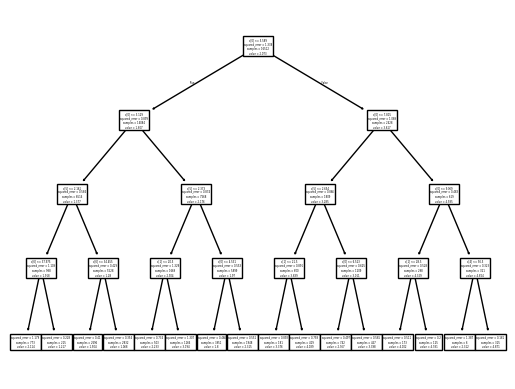

In [ ]:
plot_tree(dtr)

In [ ]:
y_pred_fch = dtr.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_fch), mean_squared_error(y_test, y_pred_fch)

(0.5728229972895775, 0.5580252209830002, 0.5728229972895775)